# TD sur pandas

# 0) import de la librairie

In [1]:
import pandas as pd

# 1) création d'une dataframe

In [13]:
url = "https://www.data.gouv.fr/fr/datasets/r/b4f8dbb9-9a4d-4203-bd6d-ba26615fa8ee"
url ="https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190927.csv"

In [14]:
df = pd.read_csv(url, sep=";")

# 2) regarde des caractéristiques

## 2.1) nb de lignes et de colonnes

In [17]:
df.shape # nb de ligne, nb de colonnes

(166, 37)

## 2.2) entête

In [16]:
df.head(3)

,numer_sta,date,lat,lon,t,td,u,dd,ff,pmer,...,nbas,hbas,cl,cm,ch,rafper,per,phenspe1,phenspe2,Unnamed: 36
0,4100300,20190927000000,15.85,-57.49,302.050000,296.750000,73.000000,60.000000,5.200000,101500,...,mq,mq,mq,mq,mq,7.700000,-10,mq,mq,NaN
1,6100001,20190927000000,43.38,7.83,294.550000,292.650000,89.000000,80.000000,2.400000,101730,...,mq,mq,mq,mq,mq,4.000000,-10,mq,mq,NaN
2,6100002,20190927000000,42.06,4.65,295.150000,293.650000,91.000000,mq,mq,101820,...,mq,mq,mq,mq,mq,mq,-10,mq,mq,NaN


## 2.3) transposée => permet souvent de voir toutes les colonnes

In [18]:
df.head(3).T

,0,1,2
numer_sta,4100300,6100001,6100002
date,20190927000000,20190927000000,20190927000000
lat,15.85,43.38,42.06
lon,-57.49,7.83,4.65
t,302.050000,294.550000,295.150000
td,296.750000,292.650000,293.650000
u,73.000000,89.000000,91.000000
dd,60.000000,80.000000,mq
ff,5.200000,2.400000,mq
pmer,101500,101730,101820


# 3) chercher les entetes sur la doc 

In [54]:
entetes = """Descriptif Mnémonique type unité
Indicatif OMM station numer_sta car
Date (UTC) date car AAAAMMDDHHMISS
Température t réel K
Point de rosée td réel K
Humidité u int %
Direction du vent moyen 10 mn dd int degré
Vitesse du vent moyen 10 mn ff réel  m/s
Pression au niveau mer pmer int Pa
Température de la mer tmer réel K
Hauteur des vagues de la mer du vent HwaHwa réel m
Période des vagues de la mer du vent PwaPwa réel S
Direction des vagues de la mer du vent dwadwa réel degré
Hauteur des vagues de la houle primaire Hw1Hw1 réel m
Période des vagues de la houle primaire Pw1Pw1 réel S
Direction des vagues de la houle primaire dw1dw1 réel degré
Hauteur des vagues de la houle secondaire Hw2Hw2 réel m
Période des vagues de la houle secondaire Pw2Pw2 réel S
Direction des vagues de la houle secondaire dw2dw2 réel degré
Variation de pression en 3 heures tend int Pa
Type de tendance barométrique cod_tend int code (0200)
Visibilité horizontale vv réel m
Temps présent ww int code (4677)
Temps passé 1 w1 int code (4561)
Temps passé 2 w2 int code (4561)
Nebulosité totale n réel %
Nébulosité des nuages de l'étage inférieur nbas int octa
Hauteur de la base des nuages de l'étage inférieur hbas int mètre
Type des nuages de l'étage inférieur cl int code (0513)
Type des nuages de l'étage moyen cm int code (0515)
Type des nuages de l'étage supérieur ch int code (0509)
Rafales sur une période  rafper réel m/s
Période de mesure de la rafale per réel min
Phénomène spécial phenspeN réel code (3778)"""

In [77]:
lignes_entetes = entetes.split("\n")

In [78]:
len(lignes_entetes)

34

## 3.1) travailler le texte pour en extraire un tableau

In [79]:
df_description = pd.DataFrame(lignes_entetes)

In [80]:
resultats = []
for ligne in lignes_entetes:
    dico = {}
    mots = ligne.split(" ")
    if "code" not in ligne:
        descriptif = " ".join(mots[:-3])
        Mnemonique = mots[-3]
        type_      = mots[-2]
        unite      = mots[-1]
    if "code" in ligne:
        descriptif = " ".join(mots[:-4])
        Mnemonique = mots[-4]
        type_      = mots[-3]
        unite      = " ".join(mots[-2:])
    dico["descriptif"] = descriptif
    dico["Mnemonique"] = Mnemonique
    dico["type_"]      = type_
    dico["unite"]      = unite   
    resultats.append(dico)
df_entete = pd.DataFrame(resultats)    

## 3.2) Afficher les noms des colonnes => attribut "columns" de la dataFrame

In [72]:
df_entete.columns

Index(['Mnemonique', 'descriptif', 'type_', 'unite'], dtype='object')

## 3.3) afficher les colonnes dans un ordre voulu

In [85]:
ordre_voulu_des_colonnes = ['descriptif', 'Mnemonique', 'type_', 'unite']

In [86]:
df_entete[ordre_voulu_des_colonnes].head()

,descriptif,Mnemonique,type_,unite
0,Descriptif,Mnémonique,type,unité
1,Indicatif OMM,station,numer_sta,car
2,Date (UTC),date,car,AAAAMMDDHHMISS
3,Température,t,réel,K
4,Point de rosée,td,réel,K


## 3.4) Suppression de lignes / colonnes : drop + axe
Drop permet de supprimer une ligne (axis = 0) ou une colonne (axis=1) correspondant à une valeur recherchée

In [84]:
df_entete[ordre_voulu_des_colonnes].drop("type_", axis=1).head()

,descriptif,Mnemonique,unite
0,Descriptif,Mnémonique,unité
1,Indicatif OMM,station,car
2,Date (UTC),date,AAAAMMDDHHMISS
3,Température,t,K
4,Point de rosée,td,K


## 3.5) 

In [87]:
df_entete[ordre_voulu_des_colonnes].head()

,descriptif,Mnemonique,type_,unite
0,Descriptif,Mnémonique,type,unité
1,Indicatif OMM,station,numer_sta,car
2,Date (UTC),date,car,AAAAMMDDHHMISS
3,Température,t,réel,K
4,Point de rosée,td,réel,K


## 3.5) filtrer une dataframe sur une valeur cherchée

In [102]:
valeur_cherchee     = df.columns[4]
filtre              = df_entete.Mnemonique == valeur_cherchee
colonne_a_recuperer = "descriptif"
serie               = df_entete[filtre][colonne_a_recuperer]

## 3.6) les dataframes sont composées de séries (les colonnes) qui ont un attribut values qui est un tableau de valeurs (une case par ligne de la colonne)

In [105]:
serie.values[0]

'Température'

## transformons les Mnémoniques par des noms signifiants

In [112]:
dico                = {}
colonne_a_recuperer = "descriptif"
for Mnemonique in df.columns:
    filtre              = df_entete.Mnemonique == Mnemonique
    serie               = df_entete[filtre][colonne_a_recuperer]
    valeur_cherchee     = "".join(serie)
    dico [Mnemonique]   = valeur_cherchee

## en mode "comprehension list"

In [117]:
{ Mnemonique : "".join(df_entete[df_entete.Mnemonique == Mnemonique]["descriptif"].values) for Mnemonique in df.columns}

{'numer_sta': '',
 'Date (UTC)': '',
 'lat': '',
 'lon': '',
 'Température': '',
 'Point de rosée': '',
 'Humidité': '',
 'Direction du vent moyen 10 mn': '',
 'ff': '',
 'Pression au niveau mer': '',
 'Température de la mer': '',
 'Hauteur des vagues de la mer du vent': '',
 'Période des vagues de la mer du vent': '',
 'Direction des vagues de la mer du vent': '',
 'Hauteur des vagues de la houle primaire': '',
 'Période des vagues de la houle primaire': '',
 'Direction des vagues de la houle primaire': '',
 'Hauteur des vagues de la houle secondaire': '',
 'Période des vagues de la houle secondaire': '',
 'Direction des vagues de la houle secondaire': '',
 'Variation de pression en 3 heures': '',
 'Type de tendance barométrique': '',
 'Visibilité horizontale': '',
 'Temps présent': '',
 'Temps passé 1': '',
 'Temps passé 2': '',
 'Nebulosité totale': '',
 "Nébulosité des nuages de l'étage inférieur": '',
 "Hauteur de la base des nuages de l'étage inférieur": '',
 "Type des nuages de 

## on fait plutôt une liste afin de pouvoir l'affecter comme nouveaux noms de colonnes dans la DataFrame

In [114]:
nouvelles_colonnes  = []
colonne_a_recuperer = "descriptif"
for Mnemonique in df.columns:
    filtre              = df_entete.Mnemonique == Mnemonique
    serie               = df_entete[filtre][colonne_a_recuperer]
    valeur_cherchee     = "".join(serie)
    if len(valeur_cherchee)>0:
        nouvelles_colonnes.append(valeur_cherchee)
    else:
        nouvelles_colonnes.append(Mnemonique)


## Affectation de nouveaux noms de colonnes dans la DataFrame

In [116]:
df.columns = nouvelles_colonnes

In [118]:
df.head()

,numer_sta,Date (UTC),lat,lon,Température,Point de rosée,Humidité,Direction du vent moyen 10 mn,ff,Pression au niveau mer,...,Nébulosité des nuages de l'étage inférieur,Hauteur de la base des nuages de l'étage inférieur,Type des nuages de l'étage inférieur,Type des nuages de l'étage moyen,Type des nuages de l'étage supérieur,Rafales sur une période,Période de mesure de la rafale,phenspe1,phenspe2,Unnamed: 36
0,4100300,20190927000000,15.85,-57.49,302.050000,296.750000,73.000000,60.000000,5.200000,101500,...,mq,mq,mq,mq,mq,7.700000,-10,mq,mq,NaN
1,6100001,20190927000000,43.38,7.83,294.550000,292.650000,89.000000,80.000000,2.400000,101730,...,mq,mq,mq,mq,mq,4.000000,-10,mq,mq,NaN
2,6100002,20190927000000,42.06,4.65,295.150000,293.650000,91.000000,mq,mq,101820,...,mq,mq,mq,mq,mq,mq,-10,mq,mq,NaN
3,62001,20190927000000,45.20,-5.00,mq,mq,mq,250,11.300000,101640,...,mq,mq,mq,mq,mq,14.400000,-10,710.000000,1114.000000,NaN
4,BATFR03,20190927000000,50.50,-0.80,289.850000,284.850000,72,260,20.100000,100670,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN


## 3.7) type des données

In [128]:
df.dtypes[:5]

numer_sta       object
Date (UTC)       int64
lat            float64
lon            float64
Température     object
dtype: object

## 3.7.1) selection par type (par exclusion ou inclusion)

In [127]:
include = ["float64"]
exclude=["int64"]
df.select_dtypes(exclude=exclude).head()

,numer_sta,lat,lon,Température,Point de rosée,Humidité,Direction du vent moyen 10 mn,ff,Température de la mer,Hauteur des vagues de la mer du vent,...,Nébulosité des nuages de l'étage inférieur,Hauteur de la base des nuages de l'étage inférieur,Type des nuages de l'étage inférieur,Type des nuages de l'étage moyen,Type des nuages de l'étage supérieur,Rafales sur une période,Période de mesure de la rafale,phenspe1,phenspe2,Unnamed: 36
0,4100300,15.85,-57.49,302.050000,296.750000,73.000000,60.000000,5.200000,302.650000,1.300000,...,mq,mq,mq,mq,mq,7.700000,-10,mq,mq,NaN
1,6100001,43.38,7.83,294.550000,292.650000,89.000000,80.000000,2.400000,295.350000,0.700000,...,mq,mq,mq,mq,mq,4.000000,-10,mq,mq,NaN
2,6100002,42.06,4.65,295.150000,293.650000,91.000000,mq,mq,294.950000,0.600000,...,mq,mq,mq,mq,mq,mq,-10,mq,mq,NaN
3,62001,45.20,-5.00,mq,mq,mq,250,11.300000,mq,3.400000,...,mq,mq,mq,mq,mq,14.400000,-10,710.000000,1114.000000,NaN
4,BATFR03,50.50,-0.80,289.850000,284.850000,72,260,20.100000,mq,mq,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN


## 3.8) statistiques descriptives

In [129]:
df.describe() # calcul la moyenne, l'écart type, etc, pour chaque colonne numérique

,Date (UTC),lat,lon,Pression au niveau mer,Unnamed: 36
count,1.660000e+02,166.000000,166.000000,166.000000,0.0
mean,2.019093e+13,39.989096,-20.340180,101323.855422,NaN
std,3.107470e+04,20.853348,42.229499,679.185486,NaN
min,2.019093e+13,-18.300000,-151.800000,99570.000000,NaN
25%,2.019093e+13,36.824993,-22.800000,101177.500000,NaN
50%,2.019093e+13,43.380000,-2.400000,101610.000000,NaN
75%,2.019093e+13,47.500000,4.640000,101760.000000,NaN
max,2.019093e+13,68.700000,7.830000,102010.000000,NaN


# 3.9) Cleaner les noms de colonnes, pour avoir de l'autocomplétion


In [159]:
import string
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [150]:
def clean(nom):
    import string
    lettres_ok = string.ascii_letters + string.digits + "éè"
    nom_lower  = nom.lower()
    cleaned    = [lettre if lettre in lettres_ok else "_" for lettre in  nom_lower ]
    cleaned    = "".join(cleaned)
    cleaned    = cleaned.replace("é", "e").replace("è", "e")
    return cleaned
    

## 3.10) on renomme les colonnes, en leur affectant une nouvelle liste de noms : 

In [154]:
df.columns = list(map(clean, df.columns))
df.columns[:3]

## Apparté : mapping sur fonction à deux paramètres => faites un param qui contient les deux param

In [187]:
def f_2_param(p1_p2):
    p1 = p1_p2[0]
    p2 = p1_p2[1]
    return p1

In [188]:
liste = [(1,2), (1,2)]

In [189]:
list(map(f_2_param, liste))

[1, 1]

# 3.10) transformer la colonne de date en objets de type date


## La fonction apply permet d'appliquer une fonction à chacune des caleurs d'une série 

In [167]:
df.date__utc_.head().apply(lambda x: [str(x)[:4], str(x)[4:6], str(x)[6:8]])

0    [2019, 09, 27]
1    [2019, 09, 27]
2    [2019, 09, 27]
3    [2019, 09, 27]
4    [2019, 09, 27]
Name: date__utc_, dtype: object

In [194]:
pd.to_datetime("21/02/2019")

Timestamp('2019-02-21 00:00:00')

In [196]:
df.date__utc_.head()

0    20190927000000
1    20190927000000
2    20190927000000
3    20190927000000
4    20190927000000
Name: date__utc_, dtype: int64

In [210]:
pd.to_datetime(df.head().date__utc_.apply(lambda x: str(x)[:14]), format="%Y%m%d%H%M%S" )

0   2019-09-27
1   2019-09-27
2   2019-09-27
3   2019-09-27
4   2019-09-27
Name: date__utc_, dtype: datetime64[ns]

## 3.11) convertir une colonne en colonne de chaine de caractère => fonction [ apply(str) ]

In [213]:
df.head().date__utc_.apply(str)

0    20190927000000
1    20190927000000
2    20190927000000
3    20190927000000
4    20190927000000
Name: date__utc_, dtype: object

## 3.12 ) remplacer une colonne par une colonne transformée en string => 2 méthodes : (1) affectation directe, ou (2) l'usage de loc

In [216]:
df["date__utc_"] = df.date__utc_.apply(str)

In [217]:
df.loc[:, "date__utc_"] = df.date__utc_.apply(str)

## 3.13) transformer une colonne en colonne de temps => pd.to_datetime

In [220]:
format_string = "%Y%m%d%H%M%S"
df.loc[:, "date_as_datetime"] = pd.to_datetime(df.date__utc_, format= format_string)

In [221]:
df.columns

Index(['numer_sta', 'date__utc_', 'lat', 'lon', 'temperature',
       'point_de_rosee', 'humidite', 'direction_du_vent_moyen_10_mn', 'ff',
       'pression_au_niveau_mer', 'temperature_de_la_mer',
       'hauteur_des_vagues_de_la_mer_du_vent',
       'periode_des_vagues_de_la_mer_du_vent',
       'direction_des_vagues_de_la_mer_du_vent',
       'hauteur_des_vagues_de_la_houle_primaire',
       'periode_des_vagues_de_la_houle_primaire',
       'direction_des_vagues_de_la_houle_primaire',
       'hauteur_des_vagues_de_la_houle_secondaire',
       'periode_des_vagues_de_la_houle_secondaire',
       'direction_des_vagues_de_la_houle_secondaire',
       'variation_de_pression_en_3_heures', 'type_de_tendance_barometrique',
       'visibilite_horizontale', 'temps_present', 'temps_passe_1',
       'temps_passe_2', 'nebulosite_totale',
       'nebulosite_des_nuages_de_l_etage_inferieur',
       'hauteur_de_la_base_des_nuages_de_l_etage_inferieur',
       'type_des_nuages_de_l_etage_inferieur',


In [225]:
une_date = df.date_as_datetime.values[0]

## 3.14) extraire des informations à partir des dates

In [241]:
df["year"] = df.date_as_datetime.apply(lambda date: date.year)
df["month"] = df.date_as_datetime.apply(lambda date: date.month)
df["hour"] = df.date_as_datetime.apply(lambda date: date.hour)
df["day"] = df.date_as_datetime.apply(lambda date: date.day)

## 3.15) faire des aggrégats

In [246]:
df.hauteur_des_vagues_de_la_houle_primaire

0      mq
1      mq
2      mq
3      mq
4      mq
5      mq
6      mq
7      mq
8      mq
9      mq
10     mq
11     mq
12     mq
13     mq
14     mq
15     mq
16     mq
17     mq
18     mq
19     mq
20     mq
21     mq
22     mq
23     mq
24     mq
25     mq
26     mq
27     mq
28     mq
29     mq
       ..
136    mq
137    mq
138    mq
139    mq
140    mq
141    mq
142    mq
143    mq
144    mq
145    mq
146    mq
147    mq
148    mq
149    mq
150    mq
151    mq
152    mq
153    mq
154    mq
155    mq
156    mq
157    mq
158    mq
159    mq
160    mq
161    mq
162    mq
163    mq
164    mq
165    mq
Name: hauteur_des_vagues_de_la_houle_primaire, Length: 166, dtype: object

## Calculs de fonctions normales (min, max, std, ...) 

In [262]:
colonne              = df.hauteur_de_la_base_des_nuages_de_l_etage_inferieur
colonne              = colonne.replace("mq", 0)
aggregations_voulues = ["min", "std", "mean", "max",  ]
colonne.agg(aggregations_voulues) 

min     0.0
std     0.0
mean    0.0
max     0.0
Name: hauteur_de_la_base_des_nuages_de_l_etage_inferieur, dtype: float64

## Remplacer les valeurs manquantes par des valeurs par défaut

In [270]:
df2 = df.replace("mq", None)
df2.temperature.apply(lambda x: float(x)).mean()

291.9548192771085

In [271]:
df2.temperature = df2.temperature.apply(lambda x: float(x))

## Calculs sur des group by

In [298]:
col = "temperature"
col = "direction_du_vent_moyen_10_mn"
df2[col] = df2[col].apply(float)
gped = df2.groupby(["year", "day", "hour"])[col].mean()
gped

year  day  hour
2019  27   0       197.857143
           1       186.250000
           2       195.555556
           3       198.888889
           4       205.000000
           5       188.571429
           6       171.538462
           7       142.142857
           8       112.142857
           9       152.142857
           10      155.384615
Name: direction_du_vent_moyen_10_mn, dtype: float64

## 4) dataviz

## 4.1) avec des lignes

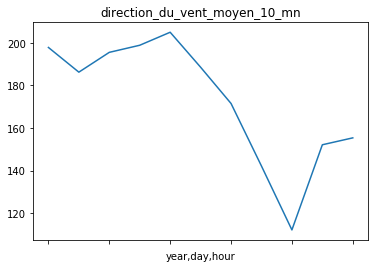

In [300]:
gped.plot(title=col)

## 4.2) avec des barres (et en forçant le zoom sur Y)

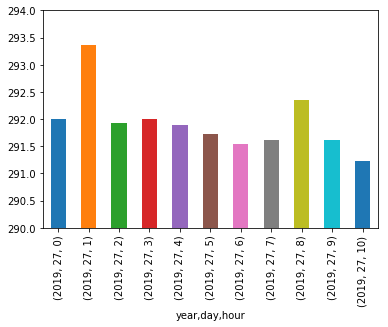

In [285]:
gped.plot(kind="bar", ylim=[290, 294])

## 4.3) boîtes à moustache

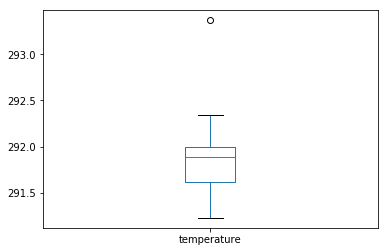

In [290]:
gped.plot.box()

## 4.5) scatter plot :

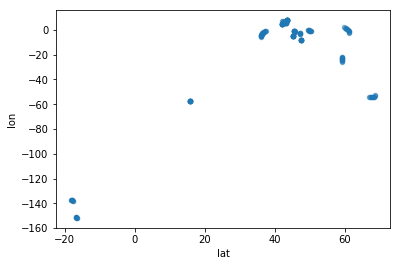

In [294]:
df2.plot.scatter(x="lat", y="lon", alpha=0.5)

# 5) concaténation et jointure de données

In [308]:
def rajouter_les_cols_de_date(df, col_date="date__utc_"):
    format_string = "%Y%m%d%H%M%S"
    df.loc[:, "date_as_datetime"] = pd.to_datetime(df.date__utc_, format= format_string)
    df["year"] = df.date_as_datetime.apply(lambda date: date.year)
    df["month"] = df.date_as_datetime.apply(lambda date: date.month)
    df["hour"] = df.date_as_datetime.apply(lambda date: date.hour)
    df["day"] = df.date_as_datetime.apply(lambda date: date.day)
    return df

In [322]:
def clean_col(df):
    df   = df.replace("mq", None)
    col1 = "temperature"
    col2 = "direction_du_vent_moyen_10_mn"
    for col in [col1, col2]:
        df[col] = df[col].apply(float)
    return df 

In [331]:
def pipeline(df):
    df = rajouter_les_cols_de_date(df)
    df = clean_col(df)
    return df

In [339]:

a_concatener = []
for month in [9]:
    for day in range(1,32):
        try:
            url_base         = "https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.2019"
            slug             = f"{month:02}{day:02}.csv"
            url              = url_base + slug
            print(url)
            if True:
                new_df           = pd.read_csv(url, sep=";")
                new_df.columns   = df2.columns[:37]
                new_df           = pipeline(new_df)
                a_concatener.append(new_df)
        except Exception as e:
            print(e)

https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190901.csv
Error tokenizing data. C error: Expected 1 fields in line 23, saw 2

https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190902.csv
Error tokenizing data. C error: Expected 1 fields in line 23, saw 2

https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190903.csv
Error tokenizing data. C error: Expected 1 fields in line 23, saw 2

https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190904.csv
Error tokenizing data. C error: Expected 1 fields in line 23, saw 2

https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190905.csv
Error tokenizing data. C error: Expected 1 fields in line 23, saw 2

https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190906.csv
Error tokenizing data. C error: Expected 1 fields in line 23, saw 2

https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/mari

/anaconda3/lib/python3.7/site-packages/pandas/core/missing.py:51: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190913.csv
https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190914.csv
https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190915.csv
https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190916.csv
https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190917.csv
https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190918.csv
https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190919.csv
https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190920.csv
https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190921.csv
https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190922.csv
https://donneespubliques.meteofrance.fr/donnees_libres/Txt/Marine/marine.20190923.csv
https://donneespubliques.meteofrance.fr/donnees_libres

In [340]:
a_concatener

[    numer_sta      date__utc_       lat     lon  temperature point_de_rosee  \
 0     4100300  20190912000000  15.86000  -57.49       301.85     298.450000   
 1     6100001  20190912000000  43.38000    7.82       296.75     291.650000   
 2     6100002  20190912000000  42.05000    4.64       294.65     290.250000   
 3       62001  20190912000000  45.20000   -5.00       294.65     290.250000   
 4     BATFR03  20190912000000  49.80000   -0.50       290.85     289.650000   
 5     BATFR20  20190912000000  41.90000    7.90       295.85     288.550000   
 6     BATFR21  20190912000000  42.90000    7.20       293.55     291.550000   
 7     BATFR23  20190912000000  39.20000    8.10       297.05     293.050000   
 8     BATFR33  20190912000000  39.60000    4.70       297.05     292.550000   
 9     BATFR34  20190912000000  48.00000   -6.90       290.85     289.850000   
 10    BATFR46  20190912000000  35.00000   -6.70       294.85     291.050000   
 11    BATFR54  20190912000000  50.20000

In [341]:
database = pd.concat(a_concatener)
database.shape

(5326, 42)

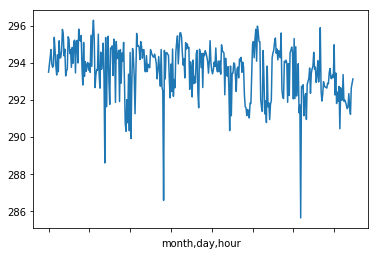

In [351]:
database.groupby(["month", "day", "hour"])["temperature"].mean().plot()

In [350]:
%matplotlib inline

# Enregistrement sur disque

In [352]:
database.to_csv("meteo.csv")